In [87]:
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import os
import shutil
from keras.preprocessing.image import ImageDataGenerator


In [64]:
folder_name  = "data/validation/"
folder_name_ = "data/train/"
destination1 = "data/train/dog/"
destination2 = "data/train/cat/"

destination_validation1 = "data/validation/dog/"
destination_validation2 = "data/validation/cat/"

if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
    
total_file_in_train = os.listdir(folder_name_)

for each_file in os.listdir(folder_name_):
    split_to_check = each_file.split('.')
    if split_to_check[0] == 'dog':
        
        if not os.path.isdir(destination1):
            os.mkdir(destination1)
        shutil.move(folder_name_+''+each_file,destination1)    
    else:
        
        if not os.path.isdir(destination2):
            os.mkdir(destination2)
        shutil.move(folder_name_+''+each_file,destination2)

In [65]:
#lets shift data some data for the validation dataset 
# we will read the data from dog first and make a directory inside the validation for the dog 
# second we will read the data from the cat and make the directory inside the validation for cat 

count = 0 
total_dog_file  = os.listdir(destination1)
len_of_total_dog_file  = len(total_dog_file)

total_cat_file  = os.listdir(destination2)
len_of_total_cat_file  = len(total_cat_file)


#dog
for each_file in total_dog_file:
    
    if not os.path.isdir(destination_validation1):
        os.mkdir(destination_validation1)
        
    #lets shift the randomly
    splitted_data = each_file.split('.')
    
    splitted_data[1] = int(np.random.rand()*len_of_total_dog_file)
    complete_file =  splitted_data[0]+'.'+str(splitted_data[1])+'.'+splitted_data[2]
    
    if count < 1000:
        try:
            shutil.move(destination1+''+complete_file,destination_validation1)
        except:
            continue
    else:
        break

#cat
count = 0
for each_file in total_cat_file:
    
    if not os.path.isdir(destination_validation2):
        os.mkdir(destination_validation2)
        
    #lets shift the randomly
    splitted_data = each_file.split('.')
    
    splitted_data[1] = int(np.random.rand()*len_of_total_cat_file)
    complete_file =  splitted_data[0]+'.'+str(splitted_data[1])+'.'+splitted_data[2]
    
    if count < 1000:
        try:
            shutil.move(destination2+''+complete_file,destination_validation2)
        except:
            continue
    else:
        break
    

In [84]:
#convolution layer 
model = Sequential() # why? because its a sequential model

model.add(Conv2D(32,(3,3),input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=  (3,3)))


model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=  (2,2)))


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_31 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_32 (Activation)   (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 21, 21, 64)        18496     
__________

In [85]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [88]:
#lets do data augmentation
batch_size=16
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        folder_name_,  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        folder_name,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 9225 images belonging to 2 classes.
Found 15775 images belonging to 2 classes.


In [89]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/50
125/125 [==============================] - 74s 591ms/step - loss: 0.6990 - acc: 0.5230 - val_loss: 0.7439 - val_acc: 0.5175
Epoch 2/50
125/125 [==============================] - 67s 540ms/step - loss: 0.6801 - acc: 0.5790 - val_loss: 0.6437 - val_acc: 0.6338
Epoch 3/50
125/125 [==============================] - 70s 557ms/step - loss: 0.6399 - acc: 0.6360 - val_loss: 0.7062 - val_acc: 0.5850
Epoch 4/50
125/125 [==============================] - 68s 540ms/step - loss: 0.6539 - acc: 0.6470 - val_loss: 0.6057 - val_acc: 0.6925
Epoch 5/50
125/125 [==============================] - 62s 497ms/step - loss: 0.6149 - acc: 0.6789 - val_loss: 0.6547 - val_acc: 0.5863
Epoch 6/50
125/125 [==============================] - 55s 442ms/step - loss: 0.5987 - acc: 0.6750 - val_loss: 0.5491 - val_acc: 0.7400
Epoch 7/50
125/125 [==============================] - 53s 424ms/step - loss: 0.5936 - acc: 0.7030 - val_loss: 0.7008 - val_acc: 0.6937
Epoch 8/50
125/125 [==============================] - 5

In [163]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

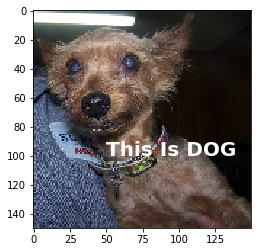

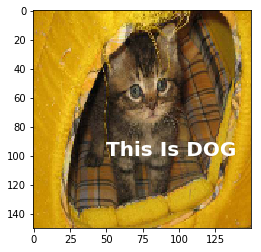

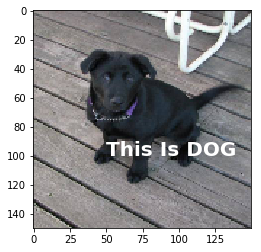

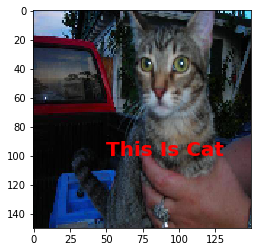

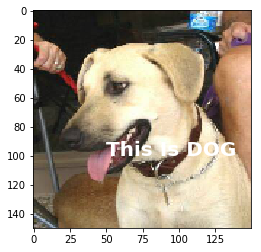

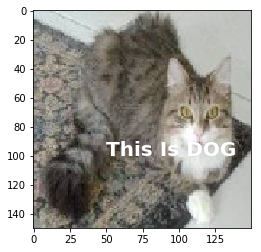

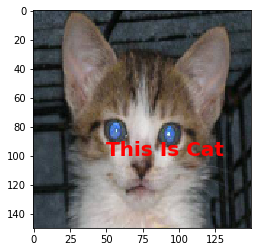

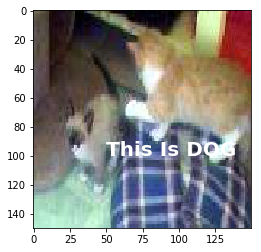

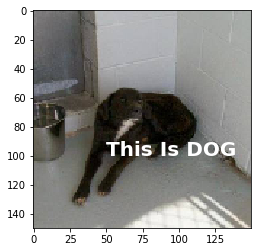

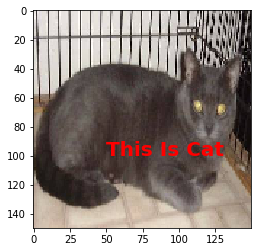

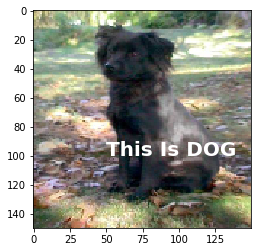

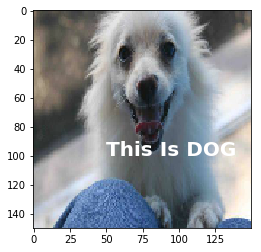

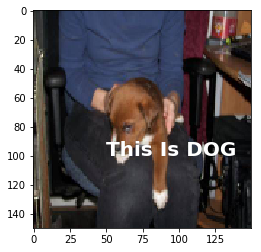

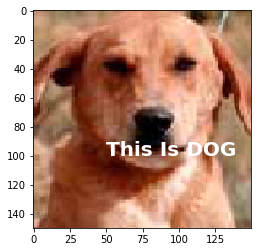

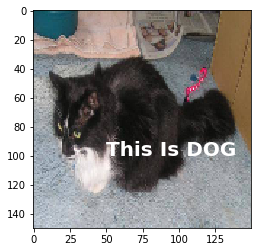

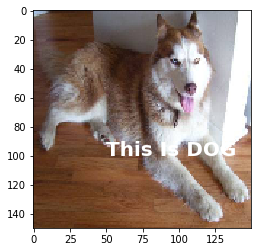

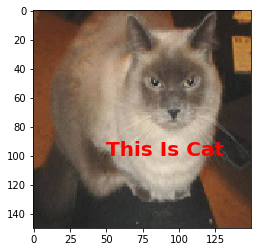

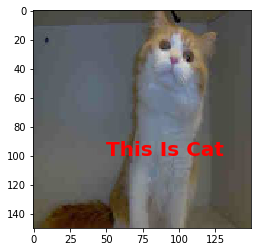

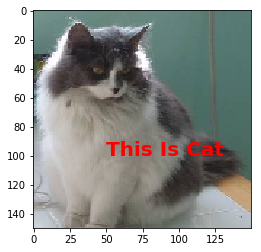

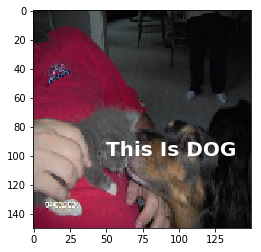

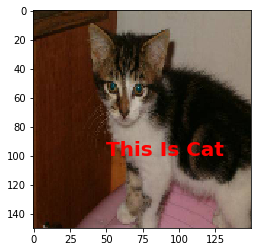

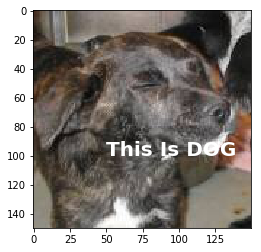

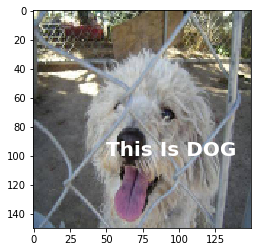

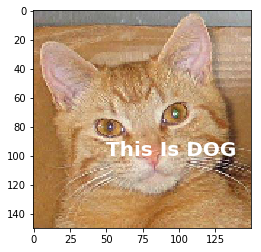

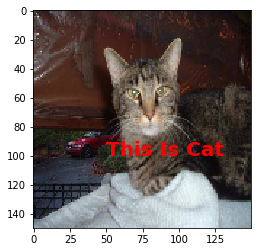

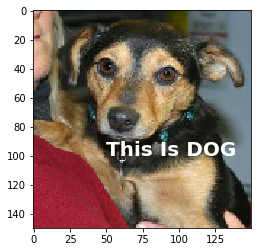

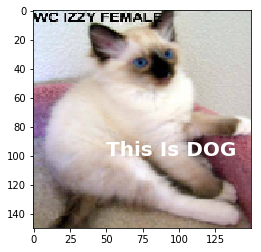

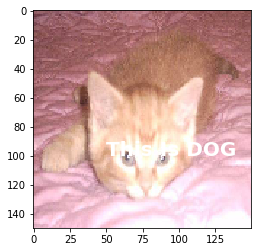

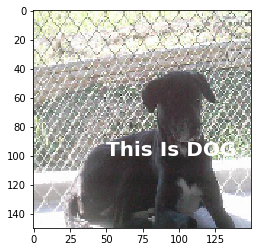

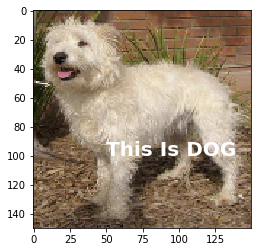

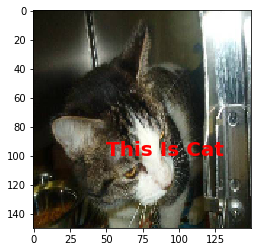

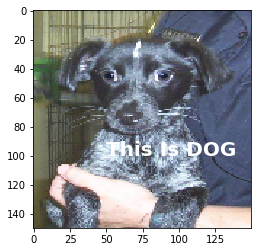

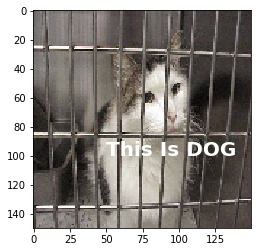

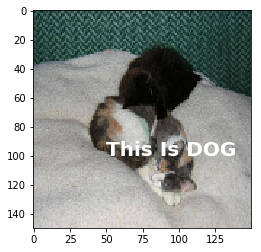

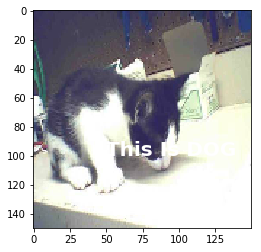

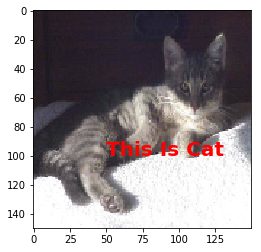

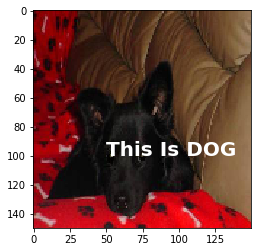

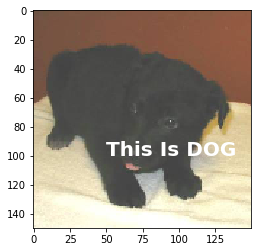

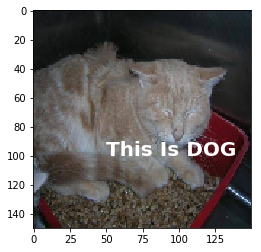

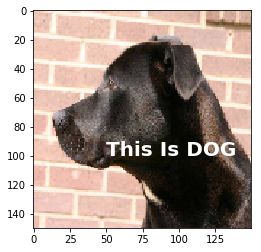

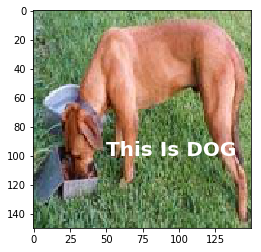

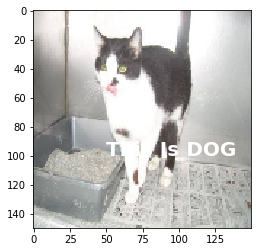

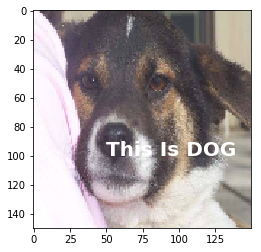

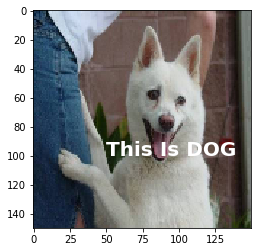

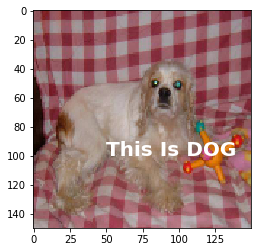

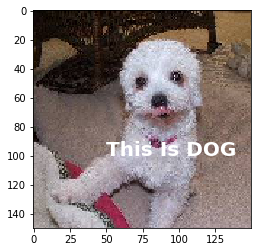

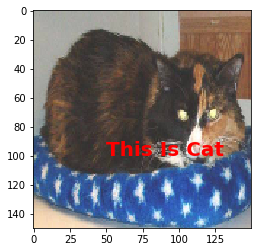

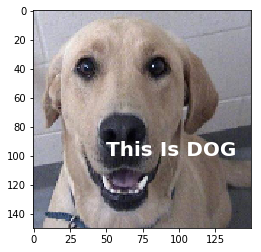

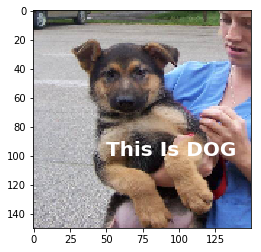

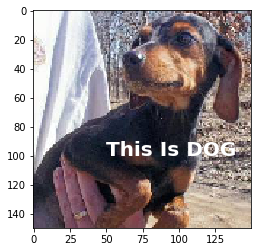

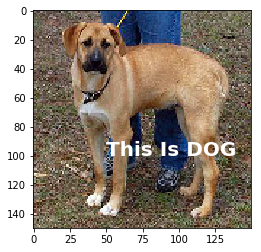

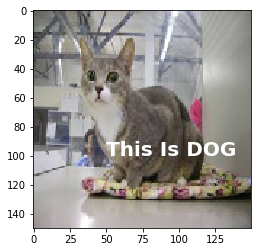

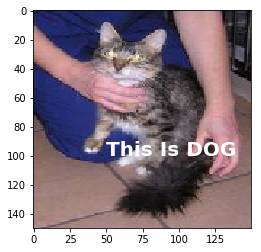

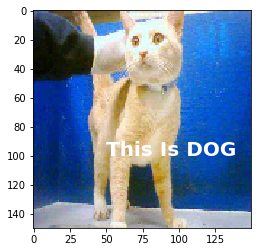

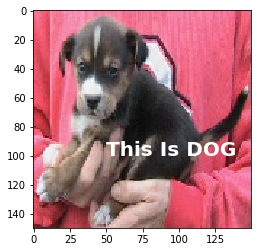

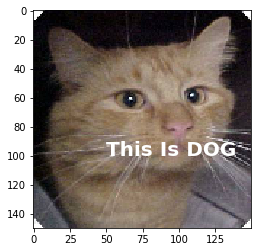

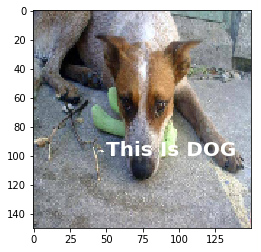

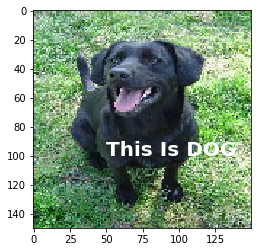

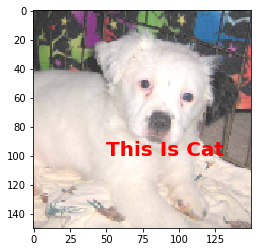

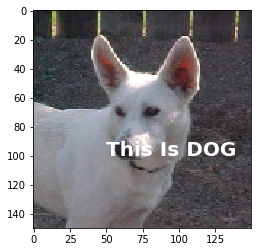

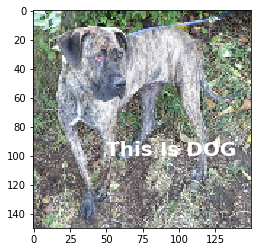

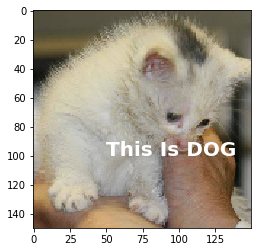

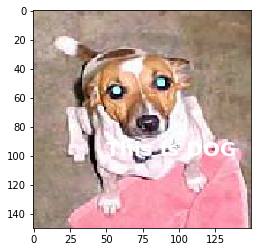

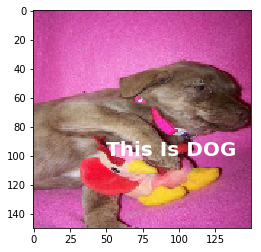

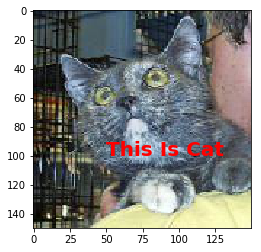

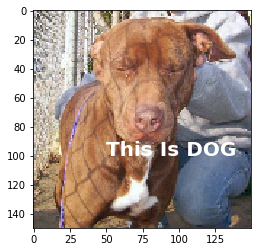

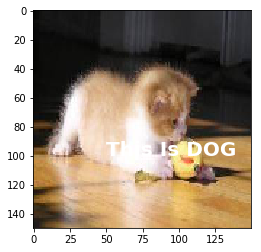

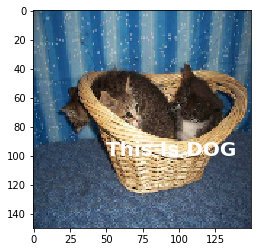

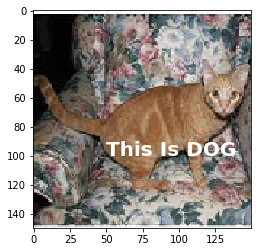

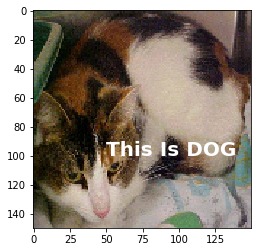

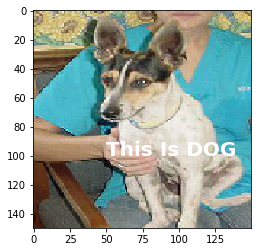

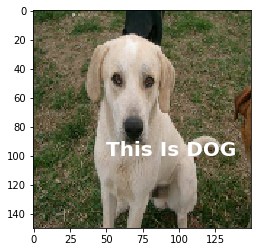

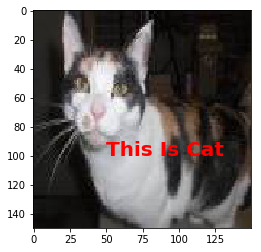

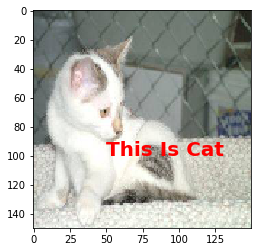

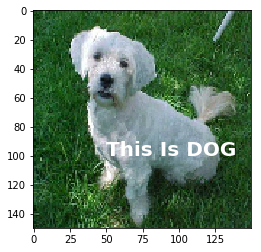

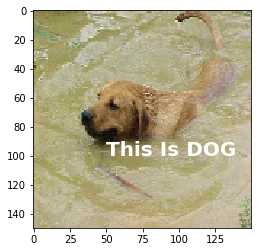

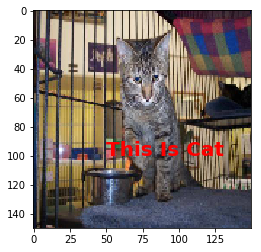

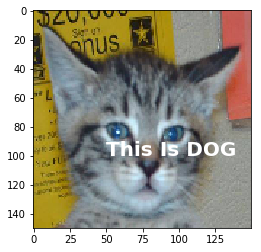

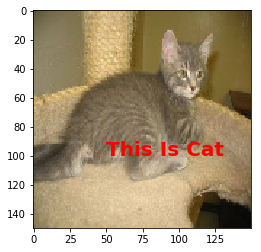

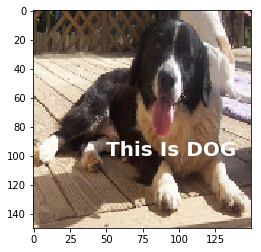

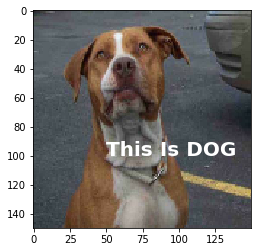

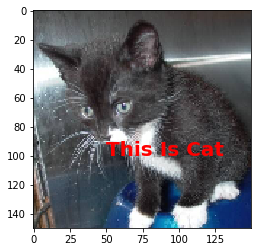

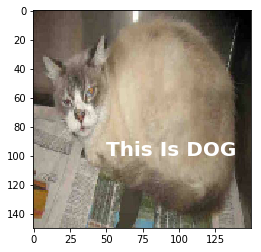

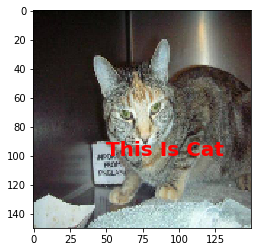

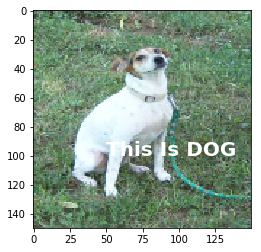

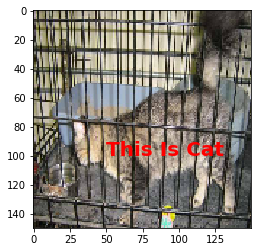

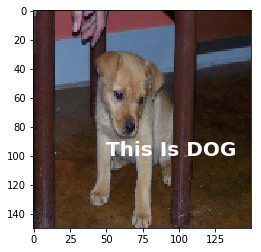

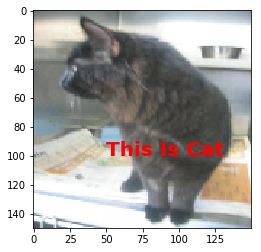

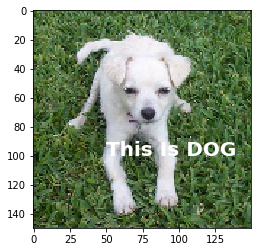

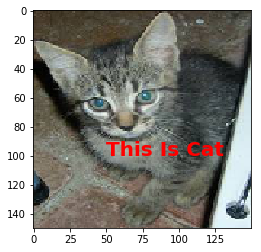

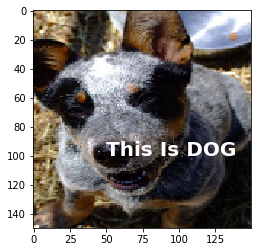

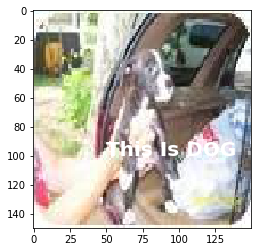

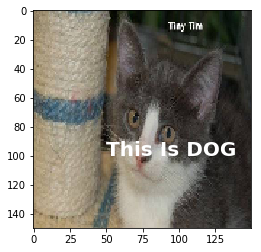

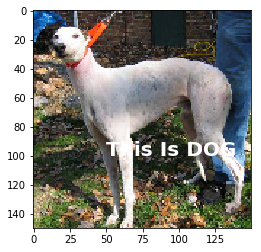

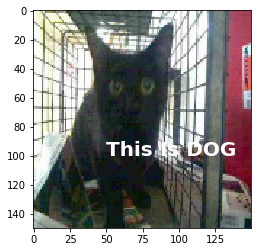

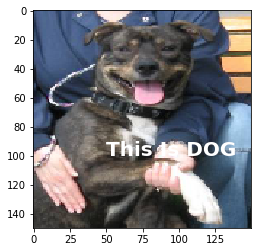

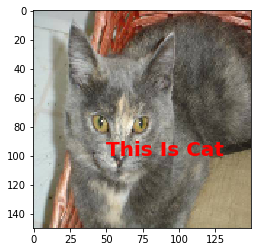

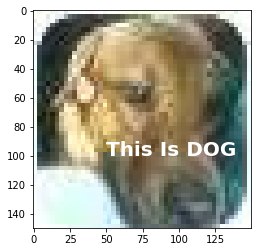

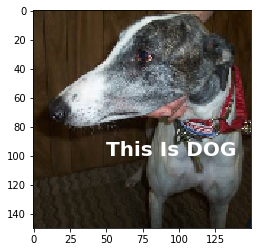

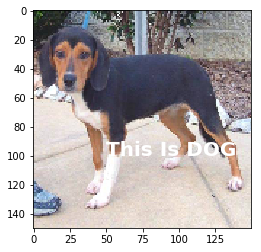

In [176]:
total_image = os.listdir("data/test1/")[:100]
for im in total_image:
    myImage = image.load_img("data/test1/"+im,target_size=(150,150,3))
    keras_image_array = image.img_to_array(myImage)
    expanded_dim = np.expand_dims(keras_image_array,axis=0)
    predicted_class = model.predict_classes(expanded_dim)
    if 1 in predicted_class[0]:
        plt.text(50,100,"This Is DOG",color='white',fontsize=20,weight='bold')
        plt.imshow(myImage)
    else:
        plt.text(50,100,"This Is Cat",color="Red",fontsize=20,weight='bold')
        plt.imshow(myImage)
    plt.show()